In [42]:
from datascience import *
import numpy as np
import matplotlib.pylab as plt


plt.style.use('fivethirtyeight')
%matplotlib inline

# Variables categóricas

Una variable categórica es un tipo de variable que toma un conjunto limitado de valores posibles y cada uno de esos valores representa una categoría o un grupo. Estas variables no tienen un orden inherente, lo que significa que no se puede hacer una comparación natural entre sus valores (por ejemplo, no se puede decir que una categoría es "mayor" o "menor" que otra).

**Nominales:** Las categorías no tienen un orden específico. Ejemplos incluyen el color de un automóvil (rojo, azul, verde) o el tipo de comida (italiana, mexicana, china).

**Ordinales:** Las categorías tienen un orden lógico, pero la diferencia entre ellas no es medible o significativa. Ejemplo: nivel educativo (primaria, secundaria, universidad).


Ejemplo: 

    - Nominales:
    
        - Color de ojos 
        
        - Tipo de vehiculo
        
        - Estado civil 

    - Ordinales:
    
        - Talla de ropa: S, M, L XL
        
        - Grado escolar: primaria, secundaria, universitarios, posgrado
        


In [43]:
frutas = Table().with_columns("Fruta", ["Manzana", "Mangostino","Mandrono", "Uva", "Pera"], \
    "Color", ["Rojo", "Cafe Oscuro","Amarillo",  "Morado", "Verde"], \
    "Cantidad", make_array(10, 20, 10, 100,20)  )

In [51]:
frutas

Fruta,Color,Cantidad
Manzana,Rojo,10
Mangostino,Cafe Oscuro,20
Mandrono,Amarillo,10
Uva,Morado,100
Pera,Verde,20


In [52]:
frutas.sort("Cantidad", descending=True)

Fruta,Color,Cantidad
Uva,Morado,100
Mangostino,Cafe Oscuro,20
Pera,Verde,20
Manzana,Rojo,10
Mandrono,Amarillo,10


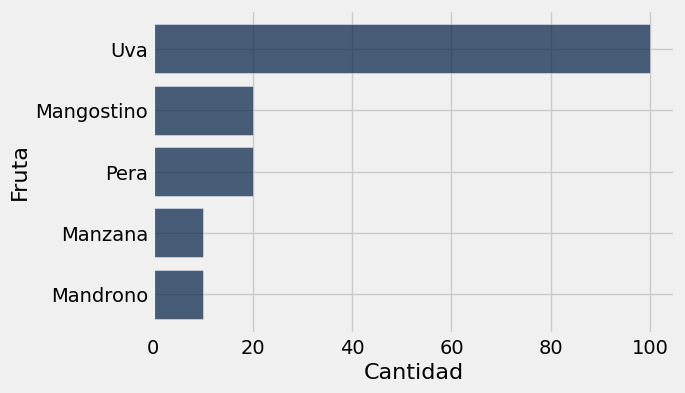

In [53]:
frutas.sort("Cantidad", descending=True).barh("Fruta", "Cantidad")

# Funcion apply

In [54]:
edades = Table().with_columns(
    'Pesona', make_array('A', 'B', 'C', 'D', 'E', 'F'),
    'Edad', make_array(17, 117, 52, 100, 6, 101)
)
edades

Pesona,Edad
A,17
B,117
C,52
D,100
E,6
F,101


In [55]:
def minimo_(x):
    return min(x, 40)

In [56]:
edades.apply(minimo_, "Edad")

array([17, 40, 40, 40,  6, 40])

In [64]:
# Crear la tabla
celulas = Table().with_columns(
    'Tiempo', ['0s', '1s', '2s', '3s', '4s'],
    'Concentracion_Celulas', ['1.0 %', ' 1.8%', ' 3.0%', '5.5 %', '10.0%' ]
)

In [73]:
a='1.0 %'


In [74]:
def cambiar(a):
    return float(a.replace("%", "").replace("s", "").strip())


In [77]:
a=celulas.apply(cambiar, "Concentracion_Celulas")
b=celulas.apply(cambiar, "Tiempo")
new_cell=Table().with_columns("Concentracion", a, "Tiempo", b)

In [78]:
new_cell

Concentracion,Tiempo
1,0
1.8,1
3,2
5.5,3
10,4


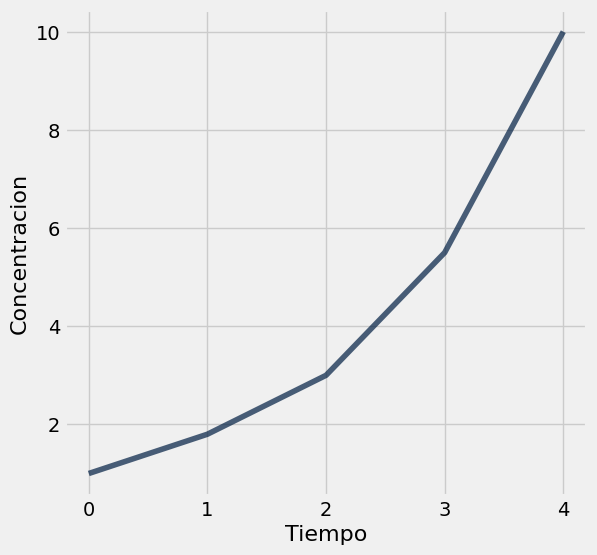

In [80]:
new_cell.plot("Tiempo", "Concentracion")

# Histogramas

In [84]:
# Parámetros de la distribución
media = 1.70  # Media de la distribución
desviacion_estandar = 0.3  # Desviación estándar
n_datos = 60  # Número de datos a generar
rng = np.random.default_rng(seed=1)  # Establecer el random state
datos = rng.normal(loc=media, scale=desviacion_estandar, size=n_datos)*100
alturas = Table().with_columns("altura", datos)
alturas

altura
180.368
194.649
179.913
130.905
197.161
183.391
153.891
187.434
180.937
178.824


In [92]:
alturas.column("altura").min()

88.665125631020942

In [93]:
alturas.column("altura").max()

233.53516265153144

In [95]:
(233.53-88.66)/5

28.974

In [96]:
117.6-88.66

28.939999999999998

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(-1.0, 0, ''),
  Text(0.0, 0, '88.665125631'),
  Text(1.0, 0, '117.639133035'),
  Text(2.0, 0, '146.613140439'),
  Text(3.0, 0, '175.587147843'),
  Text(4.0, 0, '204.561155247'),
  Text(5.0, 0, '233.535162652'),
  Text(6.0, 0, '')])

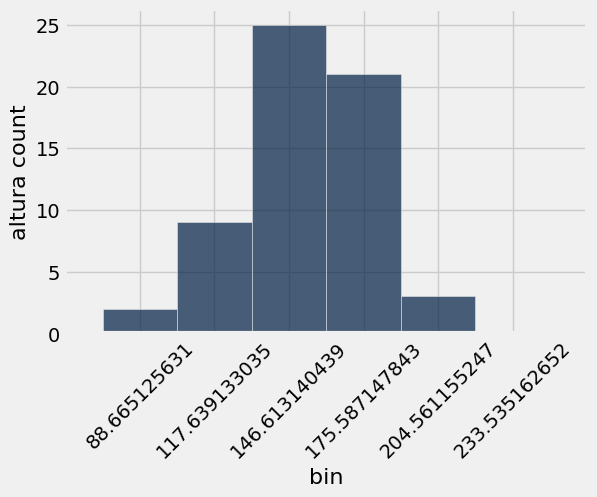

In [114]:
alturas.bin("altura", bins = 5).bar("bin", "altura count")
plt.xticks(rotation=45)

In [115]:
# Histogramas 
bins = np.linspace(min(datos), max(datos), 10)
bins

array([  88.66512563,  104.76179641,  120.85846719,  136.95513797,
        153.05180875,  169.14847953,  185.24515031,  201.34182109,
        217.43849187,  233.53516265])

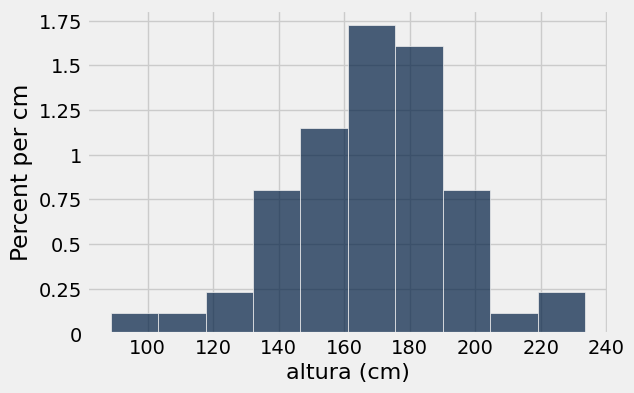

In [117]:
alturas.hist("altura", bins=10, unit="cm")


(0.0, 0.018)

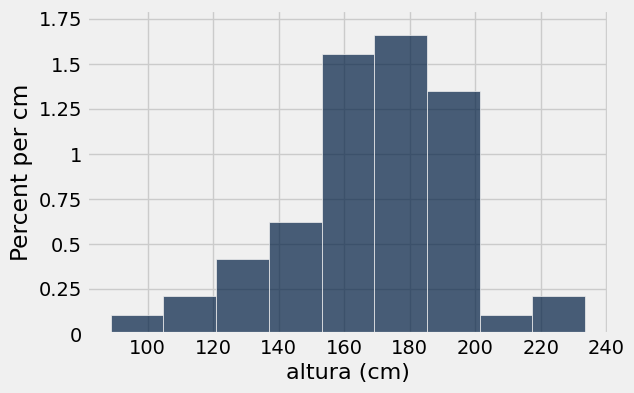

In [118]:
alturas.hist("altura", bins=bins, unit="cm")
plt.ylim(0.0, 0.018)

In [122]:
alturas.bin("altura", bins = bins)


bin,altura count
88.6651,1
104.762,2
120.858,4
136.955,6
153.052,15
169.148,16
185.245,13
201.342,1
217.438,2
233.535,0


Entendamos este gráfico:

Tomemos el bins comprendido entre 169. y 185. La separación entre datos es de 16.09, además de los datos anteriores, sabemos que hay 16 datos
en ese bins,  entonces:

El porcentaje de altura en ese bins es: 

$\mathrm{PorcentajeAlturas} = (16/60)*100 = 26.6 % $


Luego: 

$ \frac{\mathrm{PorcentajeAlturas}}{\mathrm{Delta Altura}} = \frac{26.6}{16.09} = 1.65 $

En otras paralabras. el área de la barra representa A = 1.65x16.09 = 26.6 %,  porcentaje de datos sobre 60  que están en esa caja. 


In [125]:
16.09*1.6

25.744

# Simulación 

La simulación utiliza un ordenador para replicar experimentos físicos, a menudo involucrando el azar. Aquí te presentamos un proceso simplificado para realizar simulaciones:

1. **Qué es simular?:**: Decide el tipo de simulación, como el resultado de lanzar una moneda. Cada resultado podría ser cara o sello.

2. **Simular un valor**: Encuentra cómo generar un valor para la cantidad elegida. Para una moneda, simular un lanzamiento. A menudo definimos una función para obtener el valor simulado.

3. **Número de repeticiones**: Determina cuántas veces repetir la simulación. Por ejemplo, para simular 1000 lanzamientos de moneda, repite 1000 veces.

4. **Simulación de múltiples valores**:
   - Crea una matriz vacía para almacenar resultados.
   - Genera una secuencia de repeticiones con `np.arange(n)`.
   - Usa un bucle `for` para cada repetición:
     - Simula un valor.
     - Añade el valor a la matriz.
     - 
Referencia: https://inferentialthinking.com/chapters/09/3/Simulation.html#

In [149]:
def lanzamiento(N):
    moneda = make_array("cara", "sello")
    return np.random.choice(moneda, N)

In [150]:
np.count_nonzero(lanzamiento(10)=="cara")

6

In [151]:
np.count_nonzero(lanzamiento(10)=="sello")

7

In [165]:
def simulacion_lanzamiento_moneda():
    moneda = make_array("cara", "sello")
    a=np.random.choice(moneda, 100)
    Ncaras = np.count_nonzero(a=="cara")
    return Ncaras

In [183]:
cantidad_caras=make_array()
Nmax=10000
for i in range(0, Nmax):   
    cantidad_caras = np.append(cantidad_caras, simulacion_lanzamiento_moneda())


In [184]:
cantidad_caras

array([ 56.,  47.,  51., ...,  45.,  48.,  53.])

In [185]:
simulacion = Table().with_columns("simulacion",np.arange(1, Nmax+1) ,"caras",cantidad_caras, "sellos", 100-cantidad_caras )

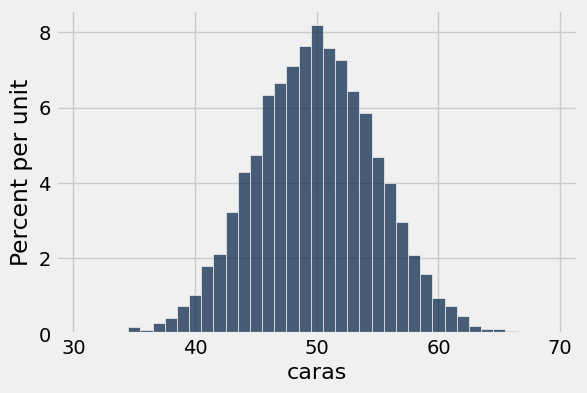

In [186]:
simulacion.hist("caras",bins = np.arange(30.5, 69.6, 1))


Crea una función llamada `dados_apuesta` que simule una apuesta simple utilizando un dado modificado. Esta función no acepta argumentos y devuelve un valor basado en un resultado aleatorio:

- Genera un número aleatorio entre 1 y 5 representando el resultado de lanzar este dado.

```python 
x = np.random.choice(np.arange(1,6))
```
- Si el resultado es 1 o 2, la función devuelve \(-1\), indicando una pérdida.
- Si el resultado es 3 o 4, devuelve \(0\), indicando que no hay ganancia ni pérdida.
- Si el resultado es 5, devuelve \(1\), indicando una ganancia.

La función simula un juego de azar, donde las probabilidades de perder, quedar neutral y ganar son distintas, reflejando un riesgo calculado al realizar la apuesta.


Con la funcion datos_apuesta(), construye un cicclo for para almacenar en esta variable
1000 tiradas de dados en una  variable llamada salida, construye una tabla y después un gráfico de barras.


In [127]:
x = np.random.choice(np.arange(1,6))
x